In [7]:
import pandas as pd

df = pd.read_csv("../data/data.csv")
print(df.columns)
df.head(5)

Index(['id', 'Country', 'year', 'goal1', 'goal2', 'goal3', 'goal4', 'goal5',
       'goal6', 'goal7', 'goal8', 'goal9', 'goal10', 'goal11', 'goal12',
       'goal13', 'goal14', 'goal15', 'goal16', 'goal17'],
      dtype='object')


,id,Country,year,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,AFG,Afghanistan,2000,8.0,27,19,2,18,14,19,44,5,NaN,34,96,99,NaN,56,42,36
1,AFG,Afghanistan,2001,8.0,30,19,2,18,13,22,44,5,NaN,31,96,99,NaN,56,42,36
2,AFG,Afghanistan,2002,9.0,30,20,2,18,16,21,44,5,NaN,32,95,99,NaN,56,42,36
3,AFG,Afghanistan,2003,10.0,32,20,2,18,17,24,44,5,NaN,32,95,98,NaN,56,42,36
4,AFG,Afghanistan,2004,10.0,31,22,2,18,16,27,44,5,NaN,33,96,98,NaN,56,42,36


In [8]:
import pandas as pd

path = "../data/data.csv"
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-01-01')
df.set_index('date', inplace=True)
df.drop(columns=['year', 'id'], inplace=True)
df.head(5)

,Country,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
date,,,,,,,,,,,,,,,,,,
2000-01-01,Afghanistan,8.0,27,19,2,18,14,19,44,5,NaN,34,96,99,NaN,56,42,36
2001-01-01,Afghanistan,8.0,30,19,2,18,13,22,44,5,NaN,31,96,99,NaN,56,42,36
2002-01-01,Afghanistan,9.0,30,20,2,18,16,21,44,5,NaN,32,95,99,NaN,56,42,36
2003-01-01,Afghanistan,10.0,32,20,2,18,17,24,44,5,NaN,32,95,98,NaN,56,42,36
2004-01-01,Afghanistan,10.0,31,22,2,18,16,27,44,5,NaN,33,96,98,NaN,56,42,36


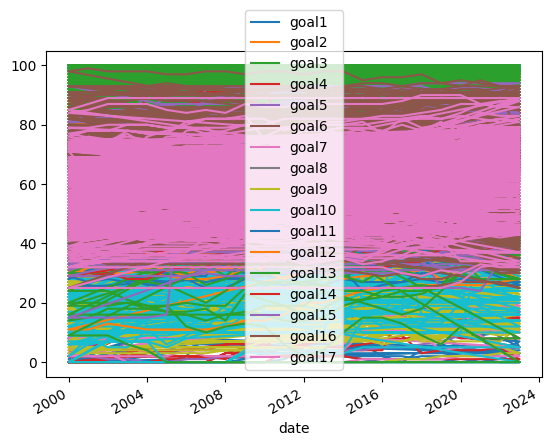

In [9]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
df.plot(ax=ax1)
plt.show()

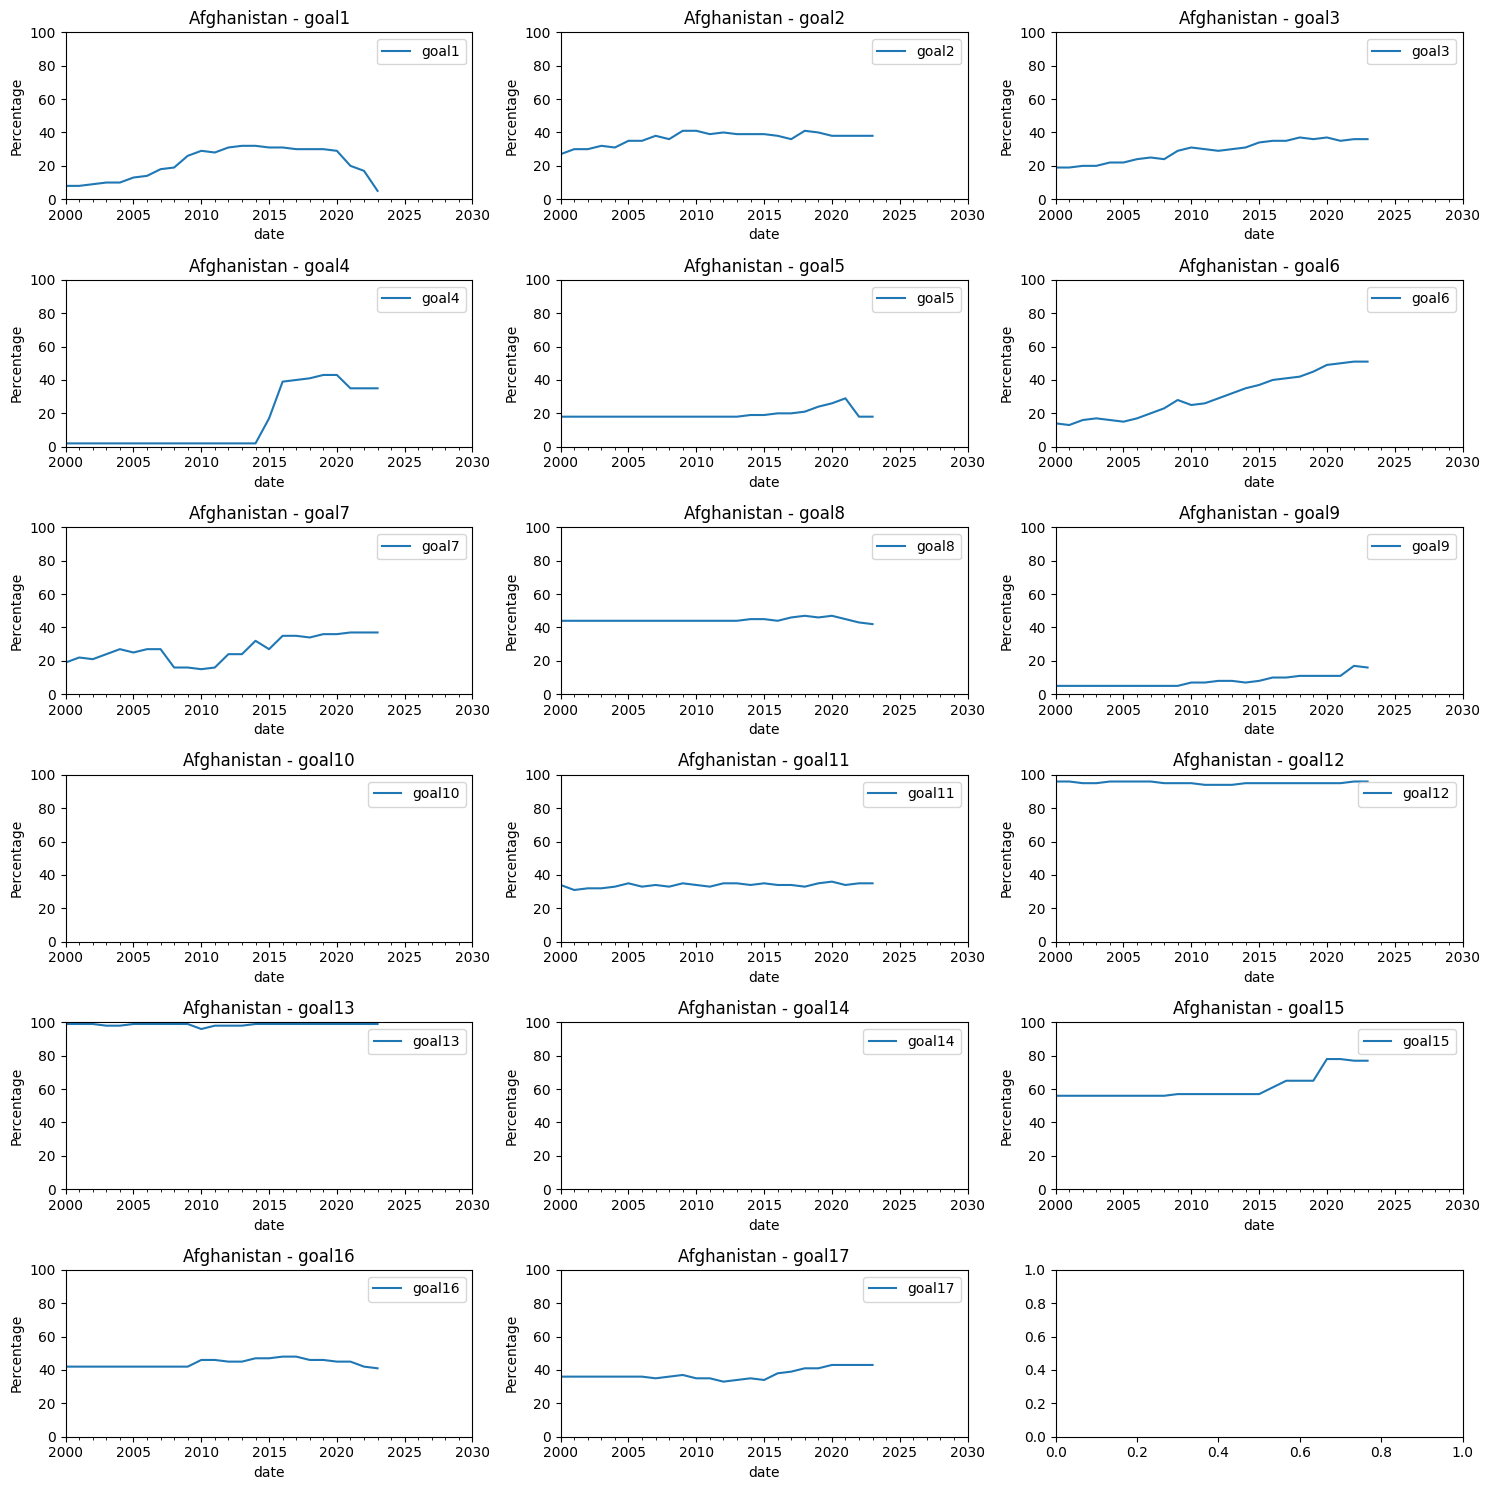

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

country = df['Country'].sample(1).iloc[0]  # Randomly select one country
country_data = df[df['Country'] == country]
country_data.reset_index(inplace=True)

fig, axes = plt.subplots(6, 3, figsize=(15, 15))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Plot each goal
for i, goal in enumerate([f'goal{i+1}' for i in range(17)]):
    ax = axes[i]
    country_data.plot(x='date', y=goal, ax=ax)
    ax.set_title(f'{country} - {goal}')
    ax.set_ylim(0, 100)  # Set y-axis to range from 0 to 100
    ax.set_xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2030-01-01'))  # Set x-axis from 2000 to 2030
    ax.set_ylabel('Percentage')

# Adjust layout for better display
plt.tight_layout()
plt.show()


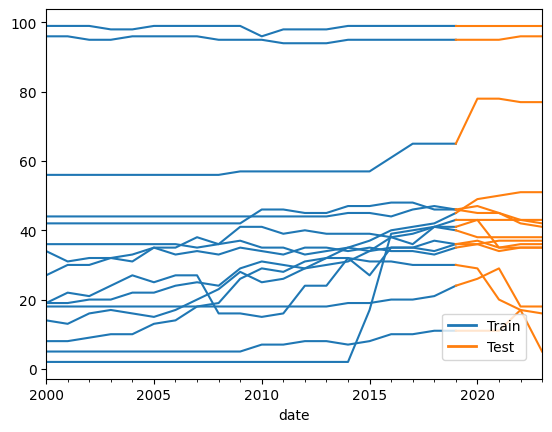

In [11]:
import matplotlib.pyplot as plt

country_data.set_index('date', inplace=True)
country_data_train = country_data.loc[:'2019'] # 2019 is not included
country_data_test = country_data.loc['2019':] # 2019 is included

fig, ax = plt.subplots()

country_data_train.plot(ax=ax, color='C0', label='Train', legend=False)
country_data_test.plot(ax=ax, color='C1', label='Test', legend=False)
ax.legend(labels=['Train', 'Test'], handles=[plt.Line2D([0], [0], color='C0', lw=2), plt.Line2D([0], [0], color='C1', lw=2)], loc='upper left', bbox_to_anchor=(0.785, 0.195), title="")
plt.show()

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()


<Axes: xlabel='date'>

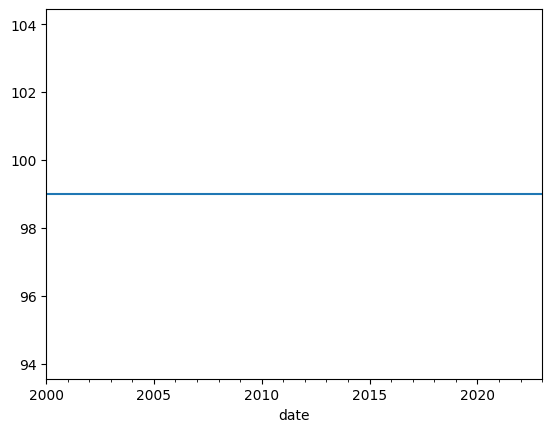

In [64]:
df[df['Country'] == 'United States']['goal1'].plot()